# Load the combined dataframe, and do some plotting 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read in the data
df = pd.read_csv("processed_data/sales_and_weather_2021-2022.csv")
# Drop the null values from the variables
df = df.dropna(subset=["temperature_mean", "temperature_min", "temperature_max", "precipitation"])
df


,date,day_of_week,month,year,week_of_year,Getränke_sales,Getränke_count,Coffee_sales,Coffee_count,Cappuccino_sales,...,precipitation,temperature_mean,temperature_max,temperature_min,sunshine_duration,cloud_cover,wind_speed,humidity,pressure,snow_depth
0,2021-01-02,Saturday,January,2021,53,692.9,486,596.4,183,230.4,...,8.0,0.0,10.0,-16.0,0.0,8.0,22.0,89.0,10127.0,0.0
1,2021-01-04,Monday,January,2021,1,429.2,297,371.9,117,192.0,...,0.0,0.0,9.0,-9.0,0.0,8.0,21.0,89.0,10134.0,0.0
2,2021-01-05,Tuesday,January,2021,1,392.8,309,378.0,117,144.0,...,10.0,5.0,11.0,-4.0,0.0,8.0,22.0,92.0,10125.0,0.0
3,2021-01-07,Thursday,January,2021,1,493.2,290,414.2,128,179.2,...,1.0,3.0,13.0,-10.0,0.0,8.0,15.0,89.0,10153.0,3.0
4,2021-01-08,Friday,January,2021,1,557.5,350,483.5,150,185.6,...,0.0,0.0,11.0,-19.0,1.0,7.0,20.0,84.0,10163.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2022-09-26,Monday,September,2022,39,882.0,338,799.4,235,190.4,...,33.0,113.0,159.0,67.0,36.0,NaN,28.0,78.0,10082.0,NaN
606,2022-09-27,Tuesday,September,2022,39,817.1,327,742.0,214,136.0,...,59.0,94.0,125.0,68.0,27.0,NaN,43.0,81.0,10012.0,NaN
607,2022-09-28,Wednesday,September,2022,39,847.2,373,778.6,228,142.8,...,10.0,93.0,120.0,56.0,4.0,NaN,26.0,83.0,9995.0,NaN
608,2022-09-29,Thursday,September,2022,39,954.0,378,882.9,254,163.2,...,0.0,90.0,135.0,44.0,11.0,NaN,10.0,81.0,10030.0,NaN


Text(0.5, 1.0, 'Correlation = 0.2996173311241595')

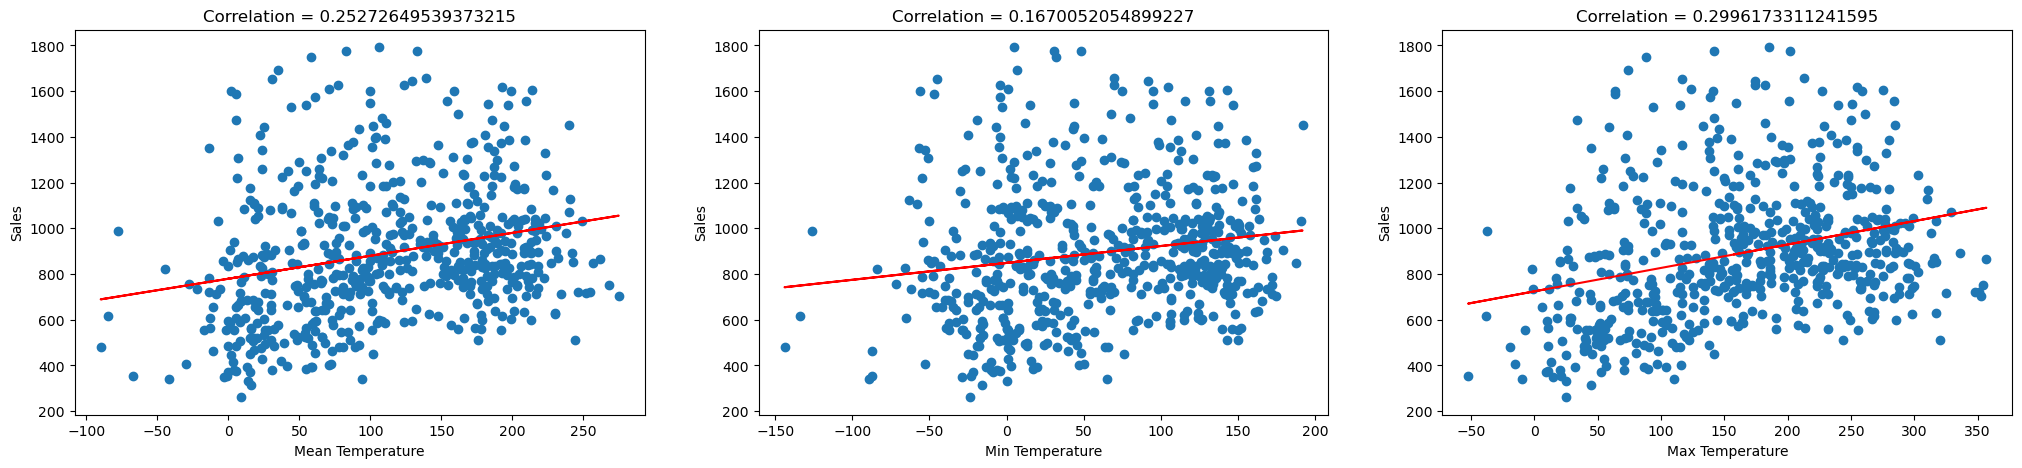

In [2]:
sales_variable = "Coffee_sales"

# plot the correlation between sales and mean, min and max temperature
fig, axes = plt.subplots(1, 3, figsize=(25, 5))

axes[0].scatter(df["temperature_mean"], df[sales_variable])
axes[0].set_xlabel("Mean Temperature")
axes[0].set_ylabel("Sales")
# fit a linear regression line with sklearn to plot the line in the plot
from sklearn.linear_model import LinearRegression
X = df["temperature_mean"].values.reshape(-1, 1)
y = df[sales_variable].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
axes[0].plot(X, reg.predict(X), color="red")
corr = df[sales_variable].corr(df["temperature_mean"]) # inbuilt function to calculate correlation???
axes[0].set_title("Correlation = {}".format(corr))


axes[1].scatter(df["temperature_min"], df[sales_variable])
axes[1].set_xlabel("Min Temperature")
axes[1].set_ylabel("Sales")
X = df["temperature_min"].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
axes[1].plot(X, reg.predict(X), color="red")
corr = df[sales_variable].corr(df["temperature_min"])
axes[1].set_title("Correlation = {}".format(corr))


axes[2].scatter(df["temperature_max"], df[sales_variable])
axes[2].set_xlabel("Max Temperature")
axes[2].set_ylabel("Sales")
X = df["temperature_max"].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
axes[2].plot(X, reg.predict(X), color="red")
corr = df[sales_variable].corr(df["temperature_max"])
axes[2].set_title("Correlation = {}".format(corr))



Text(0.5, 1.0, 'Correlation = 0.9930367142499271')

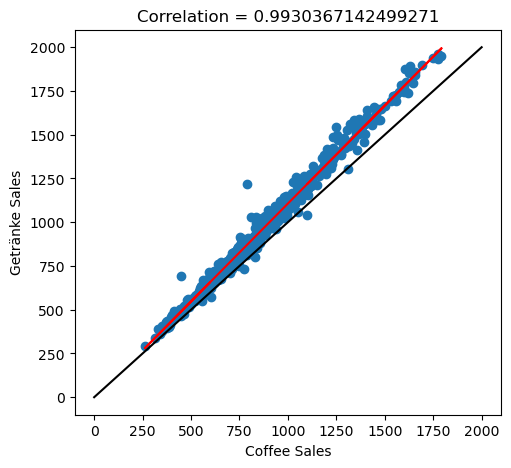

In [8]:
# plot the correlation between Coffee_sales and Getränke_sales
fig, ax = plt.subplots(1, 1, figsize=(5.5,5))

ax.scatter(df["Coffee_sales"], df["Getränke_sales"])
ax.set_xlabel("Coffee Sales")
ax.set_ylabel("Getränke Sales")
X = df["Coffee_sales"].values.reshape(-1, 1)
y = df["Getränke_sales"].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
ax.plot(X, reg.predict(X), color="red")
x_ix_y = np.linspace(0, 2000, 2000)
ax.plot(x_ix_y, x_ix_y, color="black")
corr = df["Coffee_sales"].corr(df["Getränke_sales"])
ax.set_title("Correlation = {}".format(corr))



In [ ]:
def plot_correlation(df, weather_variable, sales_variable, condition, condition_value, ax, color=None):
    df= df[df[condition] == condition_value]
    ax.scatter(df[weather_variable] / 10, df[sales_variable], color=color, s=10)
    #ax.set_xlabel(weather_variable)
    #ax.set_ylabel(sales_variable)
    X = df[weather_variable].values.reshape(-1, 1) / 10
    y = df[sales_variable].values.reshape(-1, 1)
    reg = LinearRegression().fit(X, y)
    ax.plot(X, reg.predict(X), color="black")
    corr = df[sales_variable].corr(df[weather_variable])
    ax.set_title(f"{condition_value}, Corr={corr.round(2)}", fontsize=10)

In [ ]:
weather_variable = "temperature_max"

sales_variable = "Getränke_sales"

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_colors = ["tomato", "orange", "gold", "limegreen", "deepskyblue", "royalblue", "mediumorchid"]

# change the font for the whole plot
plt.rcParams["font.family"] = "Times New Roman"

fig, ax = plt.subplots(1, 1, figsize=(3.5, 3), sharey=True, sharex=True)
ax.set_ylabel("average Getränke Sales (€)", fontsize=12, x=-0.0, y=0.5)

width = 0.4
for i, day in enumerate(days):
    ax.bar(i+1-0.5*width, df[(df["day_of_week"] == day) & (df["year"] == 2021)][sales_variable].astype("float").mean(), label=day, color=day_colors[i], width=width, alpha=0.4, )
    ax.bar(i+1+0.5*width, df[(df["day_of_week"] == day) & (df["year"] == 2022)][sales_variable].astype("float").mean(), label=day, color=day_colors[i], width=width)
    # add the standard deviation as error bars
    ax.errorbar(i+1-0.5*width, df[(df["day_of_week"] == day) & (df["year"] == 2021)][sales_variable].astype("float").mean(), yerr=df[(df["day_of_week"] == day) & (df["year"] == 2021)][sales_variable].astype("float").std(), fmt="none", color=day_colors[i], capsize=3)
    ax.errorbar(i+1+0.5*width, df[(df["day_of_week"] == day) & (df["year"] == 2022)][sales_variable].astype("float").mean(), yerr=df[(df["day_of_week"] == day) & (df["year"] == 2022)][sales_variable].astype("float").std(), fmt="none", color=day_colors[i], capsize=3)
    ax.errorbar(i+1-0.5*width, df[(df["day_of_week"] == day) & (df["year"] == 2021)][sales_variable].astype("float").mean(), yerr=df[(df["day_of_week"] == day) & (df["year"] == 2021)][sales_variable].astype("float").std(), fmt="none", color="black", capsize=3, alpha=0.6, label = "2021")
    ax.errorbar(i+1+0.5*width, df[(df["day_of_week"] == day) & (df["year"] == 2022)][sales_variable].astype("float").mean(), yerr=df[(df["day_of_week"] == day) & (df["year"] == 2022)][sales_variable].astype("float").std(), fmt="none", color="black", capsize=3, alpha=0.6)
    #ax[int(year) - 2021].set_ylim(0, 1600)
    # turn the x-axis labels 45 degrees
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
        tick.set_horizontalalignment("right")
    # use the day names as x-axis labels
    ax.set_xticks(np.arange(1, 8))
    ax.set_xticklabels(days)
    
t = ["2021", "2022", "± 1 std. dev."]

handles, labels = ax.get_legend_handles_labels()
# change the color of handels[0] to black

leg = ax.legend(handles[:3], t)
leg.legendHandles[0].set_color('grey')
leg.legendHandles[1].set_color('darkgrey')
# remove the right and top border of the fig
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.tight_layout()
plt.show()


# Plot the correlation between the max temperature and the sales for each day of the week
fig, axes = plt.subplots(1, 7, figsize=(12, 2.5), sharey=True, sharex=True, frameon=True)
fig.supxlabel("Maximal Temperature (°C)", fontsize=12, x=0.5, y=0.08) 
fig.supylabel("Getränke Sales (€)", fontsize=12, x=0.02, y=0.6)
for i, day in enumerate(days):
    plot_correlation(df, weather_variable, sales_variable, "day_of_week", day, axes[i], day_colors[i])
    axes[i].set_ylim(0, 2200)
    axes[i].set_yticks(np.arange(0, 2500, 500))
    axes[i].set_xlim(-7, 37)
    axes[i].set_xticks(np.arange(0, 40, 10))
    
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)
# tight layout to avoid overlapping of the x-axis labels

plt.tight_layout()
plt.show()







In [ ]:
weather_variable = "sunshine_duration"

sales_variable = "Getränke_sales"


# Plot the correlation between the max temperature and the sales for each day of the week
fig, axes = plt.subplots(1, 7, figsize=(12, 2.5), sharey=True, sharex=True, frameon=True)
fig.supxlabel("Sunshine Duration (h)", fontsize=12, x=0.5, y=0.08) 
fig.supylabel("Getränke Sales (€)", fontsize=12, x=0.02, y=0.6)
for i, day in enumerate(days):
    plot_correlation(df, weather_variable, sales_variable, "day_of_week", day, axes[i], day_colors[i])
    axes[i].set_ylim(0, 2200)
    axes[i].set_yticks(np.arange(0, 2500, 500))
    axes[i].set_xlim(-2, 17)
    axes[i].set_xticks(np.arange(0, 20, 5))
    
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)
# tight layout to avoid overlapping of the x-axis labels

plt.tight_layout()
plt.show()

In [ ]:
weather_variable = "precipitation"

sales_variable = "Getränke_sales"


# Plot the correlation between the max temperature and the sales for each day of the week
fig, axes = plt.subplots(1, 7, figsize=(12, 2.5), sharey=True, sharex=True, frameon=True)
fig.supxlabel("Precipitation (mm)", fontsize=12, x=0.5, y=0.08)
fig.supylabel("Getränke Sales (€)", fontsize=12, x=0.02, y=0.6)
for i, day in enumerate(days):
    plot_correlation(df, weather_variable, sales_variable, "day_of_week", day, axes[i], day_colors[i])
    axes[i].set_ylim(0, 2200)
    axes[i].set_yticks(np.arange(0, 2500, 500))
    axes[i].set_xlim(-2, 35)
    axes[i].set_xticks(np.arange(0, 40, 10))
    
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)
# tight layout to avoid overlapping of the x-axis labels

plt.tight_layout()
plt.show()

In [ ]:
weather_variable = "temperature_max"

sales_variable = "Getränke_sales"

# Plot the correlation between the max temperature and the sales for each month of the year
fig, axes = plt.subplots(2, 6, figsize=(12, 5), sharey=True, sharex=True)

fig.supylabel("Getränke Sales (€)", fontsize=12, x=0.02, y=0.6)
fig.supxlabel("Maximal Temperature (°C)", fontsize=12, x=0.5, y=0.05)
for i, month in enumerate(df["month"].unique()):
    j = 1 if i >= 6 else 0
    i = i - 6 if i >= 6 else i
    plot_correlation(df, weather_variable, sales_variable, "month", month, axes[j, i])
    axes[j,i].set_ylim(0, 2200)
    axes[j,i].set_yticks(np.arange(0, 2500, 500))
    axes[j,i].set_xlim(-7, 37)
    axes[j,i].set_xticks(np.arange(0, 40, 10))
    
    axes[j, i].spines["right"].set_visible(False)
    axes[j, i].spines["top"].set_visible(False)
plt.tight_layout()
plt.show()



In [ ]:
weather_variable = "sunshine_duration"

sales_variable = "Getränke_sales"
# Plot the correlation between the max temperature and the sales for each month of the year
fig, axes = plt.subplots(2, 6, figsize=(12, 5), sharey=True, sharex=True)

fig.supylabel("Getränke Sales (€)", fontsize=12, x=0.02, y=0.6)
fig.supxlabel("Sunshine Duration (h)", fontsize=12, x=0.5, y=0.05)
for i, month in enumerate(df["month"].unique()):
    j = 1 if i >= 6 else 0
    i = i - 6 if i >= 6 else i
    plot_correlation(df, weather_variable, sales_variable, "month", month, axes[j, i])
    axes[j,i].set_ylim(0, 2200)
    axes[j,i].set_yticks(np.arange(0, 2500, 500))
    axes[j,i].set_xlim(-2, 17)
    axes[j,i].set_xticks(np.arange(0, 20, 5))
    
    axes[j, i].spines["right"].set_visible(False)
    axes[j, i].spines["top"].set_visible(False)
plt.tight_layout()
plt.show()


In [ ]:
weather_variable = "precipitation"

sales_variable = "Getränke_sales"
# Plot the correlation between the max temperature and the sales for each month of the year
fig, axes = plt.subplots(2, 6, figsize=(12, 5), sharey=True, sharex=True)

fig.supylabel("Getränke Sales (€)", fontsize=12, x=0.02, y=0.6)
fig.supxlabel("Precipitation (mm)", fontsize=12, x=0.5, y=0.05)
for i, month in enumerate(df["month"].unique()):
    j = 1 if i >= 6 else 0
    i = i - 6 if i >= 6 else i
    plot_correlation(df, weather_variable, sales_variable, "month", month, axes[j, i])
    axes[j,i].set_ylim(0, 2200)
    axes[j,i].set_yticks(np.arange(0, 2500, 500))
    axes[j,i].set_xlim(-2, 35)
    axes[j,i].set_xticks(np.arange(0, 40, 10))
    
    axes[j, i].spines["right"].set_visible(False)
    axes[j, i].spines["top"].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
weather_variable = "temperature_max"

sales_variable = "Getränke_sales"

# Plot the correlation between the max temperature and the sales for each year
fig, axes = plt.subplots(1, 2, figsize=(4, 2.5), sharey=True, sharex=True, frameon=True)
fig.supylabel("Getränke Sales (€)", fontsize=12, x=0.02, y=0.6)
fig.supxlabel("Maximal Temperature (°C)", fontsize=12, x=0.5, y=0.08)
for i, year in enumerate(df["year"].unique()):
    plot_correlation(df, weather_variable, sales_variable, "year", year, axes[i])
    axes[i].set_ylim(0, 2200)
    axes[i].set_yticks(np.arange(0, 2500, 500))
    axes[i].set_xlim(-7, 37)
    axes[i].set_xticks(np.arange(0, 40, 10))
    
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(30, 4))

# add a vline where the day of the week is Saturday
#ax.vlines(df[df["day_of_week"] == "Saturday"]["date"].astype("datetime64"), 0, 2000, colors='lightgrey')
# add the lineplot for the sun hours
#ax.plot(df["date"].astype("datetime64"), df["sunshine_duration"].astype("float")*8, color="green")
# add the lineplot for the temperature
ax.plot(df["date"].astype("datetime64"), df["temperature_max"].astype("float"), color="red") 

ax.plot(df["date"].astype("datetime64"), df["Getränke_sales"].astype("float"))
ax.legend(["Getränke_sales", "Saturday"])

In [ ]:
# print the day where the sales were the highest
print("The day with the highest sales was {}".format(df["date"][df["Getränke_sales"].idxmax()]))
# which weekday was this?
print("This was a {}".format(df["day_of_week"][df["Getränke_sales"].idxmax()]))

In [ ]:
# plot the correlation between sales and precipitation
plt.scatter(df["precipitation"], df["Getränke_sales"])
plt.xlabel("Precipitation")
plt.ylabel("Sales")
X = df["precipitation"].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
plt.plot(X, reg.predict(X), color="red")
plt.title("R^2 = {}".format(reg.score(X, y))) # diffent way to calculate correlation???
plt.show()

In [ ]:
# plot the correlation between sales and sunshine
plt.scatter(df["sunshine_duration"], df["Getränke_sales"])
plt.xlabel("Sunshine Duration")
plt.ylabel("Sales")
X = df["sunshine_duration"].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
plt.plot(X, reg.predict(X), color="red")
plt.title("R^2 = {}".format(reg.score(X, y)))
plt.show()

In [ ]:
# calculate the correlation between sales and mean temperature
corr = df["Getränke_sales"].corr(df["temperature_mean"])
print("Correlation between sales and mean temperature: {:.2f}".format(corr))

corr = df["Getränke_sales"].corr(df["temperature_min"])
print("Correlation between sales and min temperature: {:.2f}".format(corr))

corr = df["Getränke_sales"].corr(df["temperature_max"])
print("Correlation between sales and max temperature: {:.2f}".format(corr))

# 



# Verschiende (absolut unnötige!) Experimente mit MLPs
#

In [ ]:
# now build a pytorch pipeline to predict sales based on only weather data
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

# define a dataset class
class SalesDataset(Dataset):
    def __init__(self, df):
        self.df = df
        self.X = df[["temperature_mean", "temperature_min", "temperature_max", "precipitation", "sunshine_duration"]].values
        self.y = df["Getränke_sales"].values.reshape(-1, 1)
       
        # normalize the data
        self.X = (self.X - self.X.mean(axis=0)) / self.X.std(axis=0)
        mu = self.y.mean(axis=0)
        sigma = self.y.std(axis=0)
        self.y = (self.y - mu) / sigma
        print("Mean: {}, Std: {}".format(mu, sigma))

        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# split the data into train and test set
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# create the dataset objects with normalized data
print("Train data")
train_dataset = SalesDataset(train_df)
print("Test data")
test_dataset = SalesDataset(test_df)

# create the dataloader objects
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

# define the model parameters
input_size = 5
hidden_size = 8
output_size = 1

# define the model
class SalesModel(nn.Module):
    def __init__(self):
        super(SalesModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# create the model object
model = SalesModel()

# define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
lr_scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=100)

# train the model and visualize the loss
epochs = 100
train_losses = []
test_losses = []
best_loss = np.inf

for epoch in range(epochs):
    train_loss = 0.0
    test_loss = 0.0
    model.train()
    for X, y in train_loader:
        optimizer.zero_grad()
        y_pred = model(X.float())
        loss = criterion(y_pred, y.float())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    # test the model
    model.eval()
    with torch.no_grad():
        for X, y in test_loader:
            y_pred = model(X.float())
            loss = criterion(y_pred, y.float())
            test_loss += loss.item()
        test_loss /= len(test_loader)
        test_losses.append(test_loss)
    
    if test_loss < best_loss:
        best_loss = test_loss
        print("Best loss: {:.2f}".format(best_loss))
    
    if epoch % 10 == 0:
        print("Epoch: {}, Train Loss: {:.2f}, Test Loss: {:.2f}".format(epoch, train_loss, test_loss))
    
    lr_scheduler.step()
    
   
    
print("Best loss: {:.2f}".format(best_loss))
# plot the loss
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.legend()
plt.show()
model1 = model

In [ ]:
# define a seconde dataset class to predict sales with the day of the week
class SalesDataset2(Dataset):
    def __init__(self, df):
        self.df = df 
        self.X = {"weather": df[["temperature_mean", "temperature_min", "temperature_max", "precipitation", "sunshine_duration"]].values, 
                    "date": pd.get_dummies(df["day_of_week"]).values}
        self.y = df["Getränke_sales"].values.reshape(-1, 1)
       
        # normalize the data (X is a dictionary, so we need to normalize each column separately
        self.X["weather"] = (self.X["weather"] - self.X["weather"].mean(axis=0)) / self.X["weather"].std(axis=0)
        mu = self.y.mean(axis=0)
        sigma = self.y.std(axis=0)
        self.y = (self.y - mu) / sigma
        print("Mean: {}, Std: {}".format(mu, sigma))

        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        return self.X["weather"][idx], self.X["date"][idx], self.y[idx]

# split the data into train and test set
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# create the dataset objects with normalized data
print("Train data")
train_dataset = SalesDataset2(train_df)
print("Test data")
test_dataset = SalesDataset2(test_df)

# create the dataloader objects
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

# define the model parameters
input_size_weather = 5
input_size_date = 7
hidden_size = 8
output_size = 1

# define the model
class SalesModel2(nn.Module):
    def __init__(self):
        super(SalesModel2, self).__init__()
        self.fc1 = nn.Linear(input_size_weather, hidden_size)
        self.fc2 = nn.Linear(input_size_date, hidden_size)
        self.fc3 = nn.Linear(hidden_size*2,  hidden_size)
        self.fc4 = nn.Linear(hidden_size, hidden_size)
        self.fc5 = nn.Linear(hidden_size, output_size)
        
        
        
    def forward(self, x_weather, x_date):
        x_weather = F.relu(self.fc1(x_weather))
        x_date = F.relu(self.fc2(x_date))
        x = torch.cat((x_weather, x_date), dim=1)
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        
        return x

# create the model object
model = SalesModel2()

# define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
lr_scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=100)

# train the model and visualize the loss
epochs = 100
train_losses = []
test_losses = []
best_loss = np.inf

for epoch in range(epochs):
    train_loss = 0.0
    test_loss = 0.0
    model.train()
    for X_weather, X_date, y in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_weather.float(), X_date.float())
        loss = criterion(y_pred, y.float())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    model.eval()
    with torch.no_grad():
        for X_weather, X_date, y in test_loader:
            y_pred = model(X_weather.float(), X_date.float())
            loss = criterion(y_pred, y.float())
            test_loss += loss.item()
        test_loss /= len(test_loader)
        test_losses.append(test_loss)

    if test_loss < best_loss:
        best_loss = test_loss
        print("Best loss: {:.2f}".format(best_loss))
    
    if epoch % 10 == 0:
        print("Epoch: {}, Train Loss: {:.2f}, Test Loss: {:.2f}".format(epoch, train_loss, test_loss))
    
    lr_scheduler.step()

print("Best loss: {:.2f}".format(best_loss))
# plot the loss
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.legend()
plt.show()
model2 = model

In [ ]:
# define a third dataset class to predict sales with only the day of the week
class SalesDataset3(Dataset):
    def __init__(self, df):
        self.df = df 
        self.X = pd.get_dummies(df["day_of_week"]).values
        self.y = df["Getränke_sales"].values.reshape(-1, 1)
       
        # normalize the data
        mu = self.y.mean(axis=0)
        sigma = self.y.std(axis=0)
        self.y = (self.y - mu) / sigma
        print("Mean: {}, Std: {}".format(mu, sigma))

        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# split the data into train and test set
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# create the dataset objects with normalized data
print("Train data")
train_dataset = SalesDataset3(train_df)
print("Test data")
test_dataset = SalesDataset3(test_df)

# create the dataloader objects
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

# define the model parameters
input_size = 7
hidden_size = 32
output_size = 1

# define the model
class SalesModel3(nn.Module):
    def __init__(self):
        super(SalesModel3, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# create the model object
model = SalesModel3()

# define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
lr_scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=100)

# train the model and visualize the loss
epochs = 100
train_losses = []
test_losses = []
best_loss = np.inf

for epoch in range(epochs):
    train_loss = 0.0
    test_loss = 0.0
    model.train()
    for X, y in train_loader:
        optimizer.zero_grad()
        y_pred = model(X.float())
        loss = criterion(y_pred, y.float())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    model.eval()
    with torch.no_grad():
        for X, y in test_loader:
            y_pred = model(X.float())
            loss = criterion(y_pred, y.float())
            test_loss += loss.item()
        test_loss /= len(test_loader)
        test_losses.append(test_loss)

    if test_loss < best_loss:
        best_loss = test_loss
        print("Best loss: {:.2f}".format(best_loss))
    
    if epoch % 10 == 0:
        print("Epoch: {}, Train Loss: {:.2f}, Test Loss: {:.2f}".format(epoch, train_loss, test_loss))
    
    lr_scheduler.step()

print("Best loss: {:.2f}".format(best_loss))
# plot the loss
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.legend()
plt.show()
model3 = model

In [ ]:
dataset = SalesDataset2(df)
day = 144+7
print(dataset.X["date"][day])
print(dataset.X["weather"][day])
print(dataset.y[day])
print(df[day:day+1])

In [ ]:
# test manually to see if the day of the week makes a difference in the prediction


pred1 = model1(torch.tensor([1.59759539,  1.34599214,  1.56808058, -0.40700749,  1.53056742]).float().unsqueeze(0))
pred2 = model2(torch.tensor([1.59759539,  1.34599214,  1.56808058, -0.40700749,  1.53056742]).float().unsqueeze(0), torch.tensor([0, 0, 0, 0, 0, 0, 1]).float().unsqueeze(0))
pred3 = model3(torch.tensor([0, 0, 0, 0, 0, 0, 1]).float().unsqueeze(0))
print(pred1)
print(pred2)
print(pred3)
# un-normalize the data
mu = 949.91726592
sigma = 404.25934273
pred1 = pred1.item() * sigma + mu
pred2 = pred2.item() * sigma + mu
pred3 = pred3.item() * sigma + mu

print("Prediction 1: {:.2f}".format(pred1))
print("Prediction 2: {:.2f}".format(pred2))
print("Prediction 3: {:.2f}".format(pred3))
